# <span style="color:#1E90FF">**Maternal Death Rates**</span> 
### <span style="color:#187bcd">Ana Boulay, PUBH 1142 Final Project</span>

## <span style="color:#1565C0">Introduction</span>

### <span style="color:black"> This project examines trends in maternal mortality in the United States using data compiled across multiple time periods from 2019 onward. The dataset, titled "Maternal Mortality Data", includes 660 records documenting monthly metrics on maternal deaths, live births, and calculated maternal mortality rates. The data is broken down by jurisdiction, demographic group, and time period, allowing for a detailed look at how maternal health outcomes vary over time and across different populations.

### <span style="color:black"> Key variables in the dataset include the number of maternal deaths, the total number of live births, and the resulting maternal mortality rate per 100,000 live births. While most fields are complete, some entries for maternal deaths and mortality rates contain missing data. This dataset provides a valuable foundation for identifying patterns, disparities, and areas of concern in maternal health, making it especially relevant for public health research and policy development.

### <span style="color:black"> Despite modern medicine and scientific discoveries, maternal and infant health and mortality rates are still a pressing issue in medical and public health spaces. This issue has become much more important amidst spending cuts at federal health agencies. Additionally, researchers who specialize in maternal mortality have had funding taken away and a large part of the department at the Centers for Disease Control and Prevention who monitor and improve maternal and child health were placed on leave (Anil Oza, 2025). Investigating maternal mortality rates is even more pressing and important due to current funding cuts.

## <span style="color:#1565C0">Methods</span>

### <span style="color:black">**Data Source and Structure**</span>
### <span style="color:black"> This data has multiple variables, primarily the way it is broken up is by year of death, group, and subgroup. The group sections are total, age, and race and Hispanic origin. The total section has 66 data points, the age section has 198 data points and race and hispanic origin has 396 data points. Within the subgroup section, the categories are total, which is under the total group. Under 25 years old, 25-39 years old, and 40 years and over are the subgroups under the age group. Hispanic, American Indian or Alaska Native, Non-Hispanic, Asian, Non-Hispanic, Black, Non-Hispanic, Native Hawaiian or Other Pacific Islander, Non-Hispanic, and White, Non-Hispanic are all subgroups of the Race and Hispanic origin group. Each subgroup has 66 data points.

### <span style="color:black"> The year of death ranges from 2019 to 2024. For each subgroup, years 2019-2023 has 12 entries with 2024 having 6 entries. The data is further broken down into month of death in addition to year of death with years 2019 to 2023 having 12 entries, with data from each month of the year. The 2024 years of death have 6 entries, with data from the first 6 months of the year. 

### <span style="color:black"> The other categories in the data are maternal deaths, live births, and maternal mortality rate per 100,000. The maternal mortality rates were found by dividing the maternal deaths by the live births. 

### <span style="color:black"> In conclusion, each record corresponds to a specific month and contains information on jurisdiction, demographic grouping, number of maternal deaths, number of live births, and the maternal mortality rate (MMR), defined as the number of maternal deaths per 100,000 live births. For every subgroup there is a number of maternal deaths, number of live births, and maternal mortality rate for each month of the year from 2019 to 2023. For the year of 2024 this data is available for the first 6 months of the year, from January to June. 
### <span style="color:black"> 

In [329]:
pip install nbstripout



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [330]:
nbstripout --install


NameError: name 'nbstripout' is not defined

## <span style="color:#1565C0">Results</span>

In [71]:
# Print the different subgroups
maternal['Subgroup'].unique()

# Get unique subgroups and format as bullet points
subgroups = maternal['Subgroup'].unique()
for group in subgroups:
    print(f"• {group}")

• Total
• Under 25 years
• 25-39 years
• 40 years and over
• Hispanic
• American Indian or Alaska Native Non-Hispanic
• Asian Non-Hispanic
• Black Non-Hispanic
• Native Hawaiian or Other Pacific Islander Non-Hispanic
• White Non-Hispanic


Average Maternal Mortality Rate by Subgroup:
--------------------------------------------------
•40 years and over: 92.35
•Black Non-Hispanic: 52.36
•Total: 22.97
•25-39 years: 22.02
•White Non-Hispanic: 18.97
•Hispanic: 17.00
•Under 25 years: 14.56
•Asian Non-Hispanic: 13.72


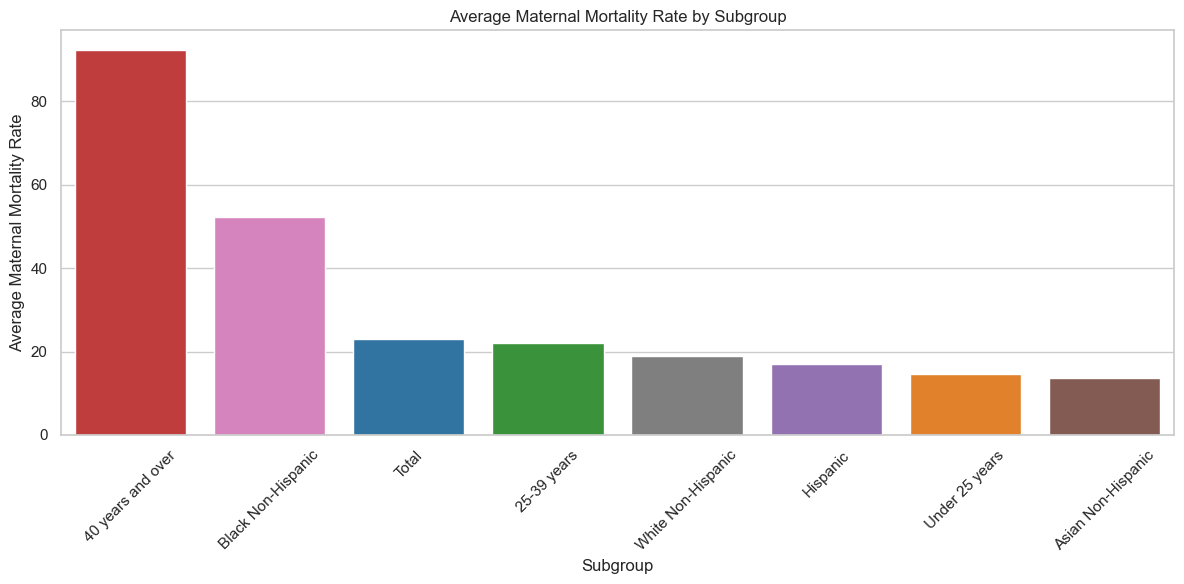

In [257]:
# Calculate average MMR for each subgroup and sort in descending order, excluding specified groups
mmr_by_subgroup = maternal.groupby('Subgroup')['Maternal Mortality Rate'].mean()
excluded_groups = ["American Indian or Alaska Native Non-Hispanic", 
                  "Native Hawaiian or Other Pacific Islander Non-Hispanic"]
filtered_mmr = mmr_by_subgroup[~mmr_by_subgroup.index.isin(excluded_groups)].sort_values(ascending=False)

# Print with formatted output
print("Average Maternal Mortality Rate by Subgroup:")
print("-" * 50)
for subgroup, mmr in filtered_mmr.items():
    print(f"•{subgroup}: {mmr:.2f}")

# Create a dictionary mapping each subgroup to a specific color hex code
subgroup_colors = {
    'Total': '#1f77b4',  # blue
    'Under 25 years': '#ff7f0e',  # orange
    '25-39 years': '#2ca02c',  # green
    '40 years and over': '#d62728',  # red
    'Hispanic': '#9467bd',  # purple
    'Asian Non-Hispanic': '#8c564b',  # brown
    'Black Non-Hispanic': '#e377c2',  # pink
    'White Non-Hispanic': '#7f7f7f'   # gray
}

# Create the MMR plot with consistent colors
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_mmr.index, y=filtered_mmr.values, 
             palette=[subgroup_colors[x] for x in filtered_mmr.index],
             hue=filtered_mmr.index, legend=False)
plt.title("Average Maternal Mortality Rate by Subgroup")
plt.xlabel("Subgroup")
plt.ylabel("Average Maternal Mortality Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Live Births by Subgroup:
--------------------------------------------------
•Total: 3,669,128
•25-39 years: 2,716,036
•White Non-Hispanic: 1,863,051
•Hispanic: 903,570
•Under 25 years: 816,371
•Black Non-Hispanic: 521,907
•Asian Non-Hispanic: 222,966
•40 years and over: 136,721


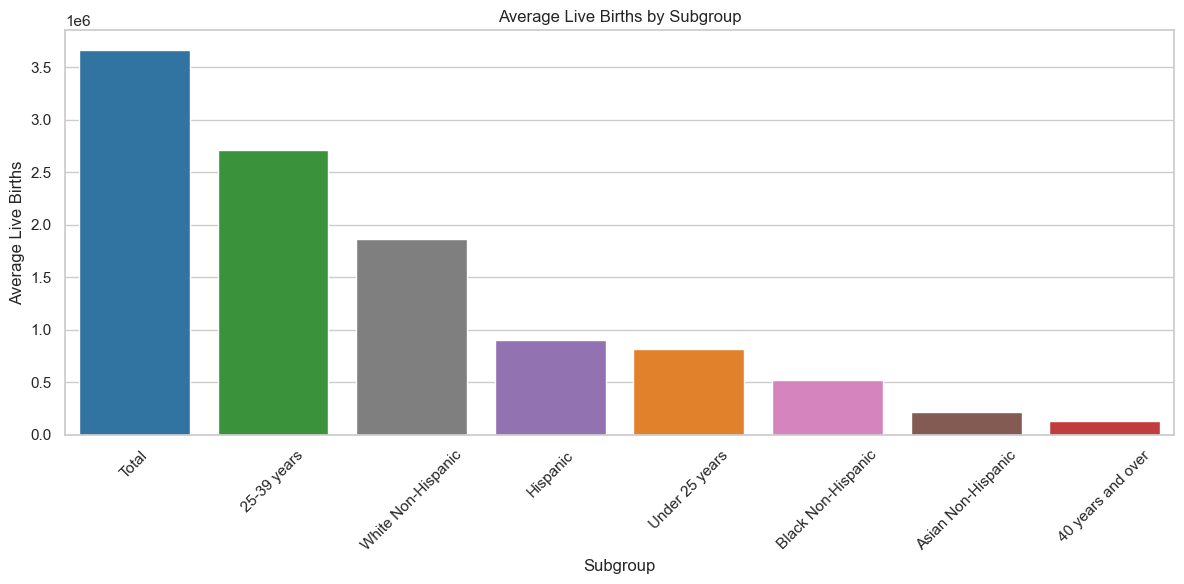

In [251]:
# Calculate average live births for each subgroup and sort in descending order
births_by_subgroup = maternal.groupby('Subgroup')['Live Births'].mean()
excluded_groups = ["American Indian or Alaska Native Non-Hispanic", 
                  "Native Hawaiian or Other Pacific Islander Non-Hispanic"]
filtered_births = births_by_subgroup[~births_by_subgroup.index.isin(excluded_groups)].sort_values(ascending=False)

# Print with formatted output
print("Average Live Births by Subgroup:")
print("-" * 50)
for subgroup, births in filtered_births.items():
    print(f"•{subgroup}: {births:,.0f}")

# Create the Live Births plot with the same colors
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_births.index, y=filtered_births.values, 
             palette=[subgroup_colors[x] for x in filtered_births.index],
             hue=filtered_births.index, legend=False)
plt.title("Average Live Births by Subgroup")
plt.xlabel("Subgroup")
plt.ylabel("Average Live Births")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Maternal Deaths by Subgroup:
--------------------------------------------------
•Total: 136,721
•25-39 years: 136,721
•White Non-Hispanic: 136,721
•Black Non-Hispanic: 136,721
•Hispanic: 136,721
•40 years and over: 136,721
•Under 25 years: 136,721
•Asian Non-Hispanic: 136,721


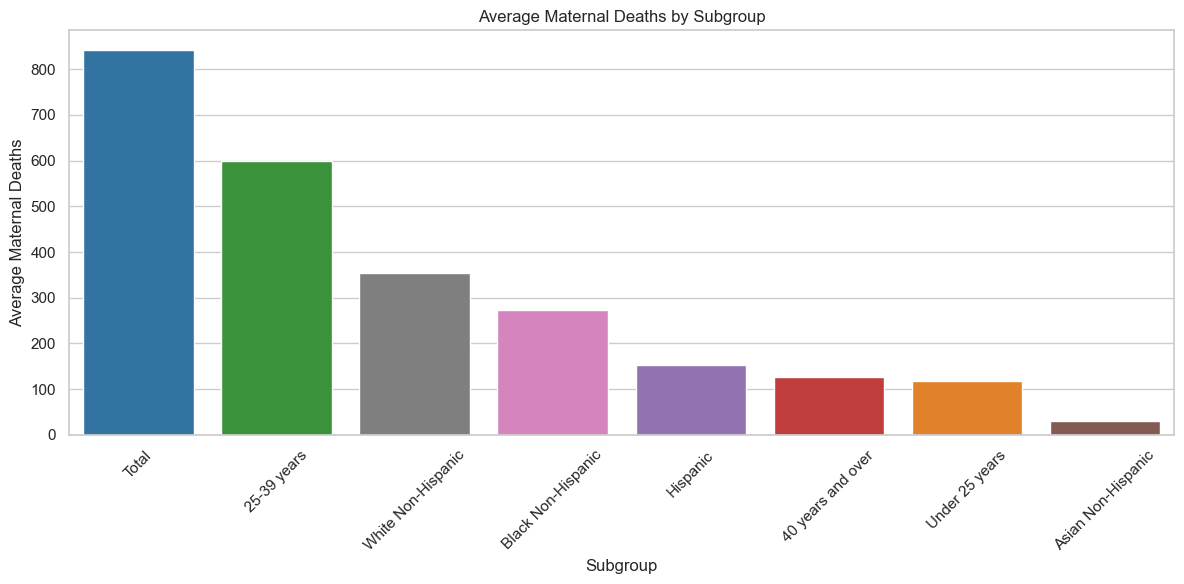

In [252]:
# Calculate average Maternal Deaths for each subgroup and sort in descending order
deaths_by_subgroup = maternal.groupby('Subgroup')['Maternal Deaths'].mean()
excluded_groups = ["American Indian or Alaska Native Non-Hispanic", 
                  "Native Hawaiian or Other Pacific Islander Non-Hispanic"]
filtered_deaths = deaths_by_subgroup[~births_by_subgroup.index.isin(excluded_groups)].sort_values(ascending=False)

# Print with formatted output
print("Average Maternal Deaths by Subgroup:")
print("-" * 50)
for subgroup, deaths in filtered_deaths.items():
    print(f"•{subgroup}: {births:,.0f}")

# Create the Maternal Deaths plot with the same colors
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_deaths.index, y=filtered_deaths.values, 
             palette=[subgroup_colors[x] for x in filtered_deaths.index],
             hue=filtered_deaths.index, legend=False)
plt.title("Average Maternal Deaths by Subgroup")
plt.xlabel("Subgroup")
plt.ylabel("Average Maternal Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


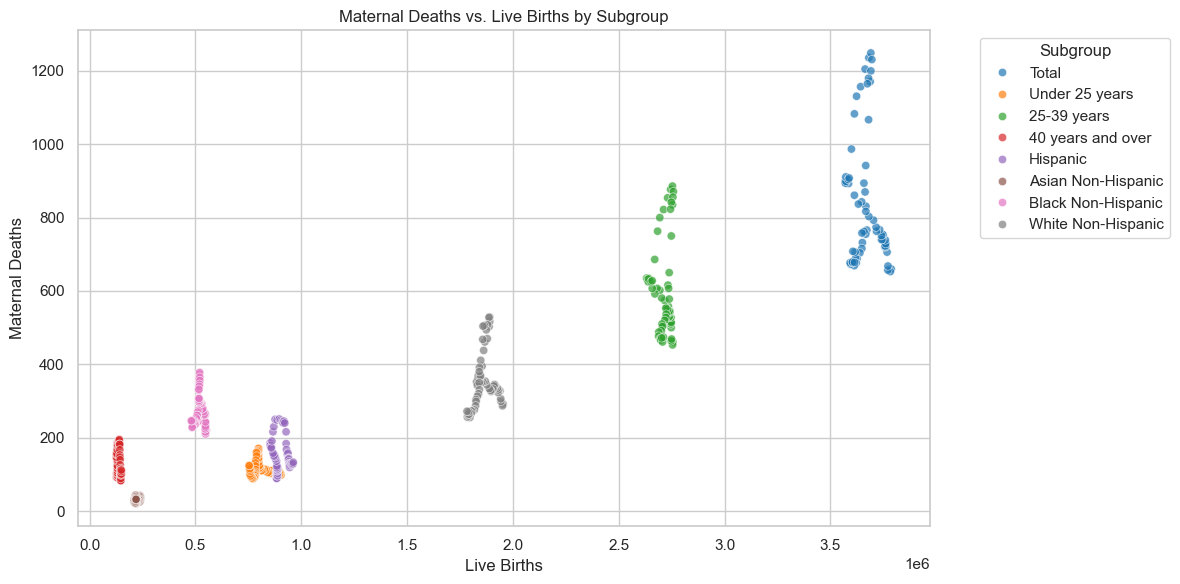

In [259]:
# Create a scatter plot of Maternal Deaths vs. Live Births
plt.figure(figsize=(12, 6))

# Filter out the excluded groups from the data
excluded_groups = ["American Indian or Alaska Native Non-Hispanic", 
                  "Native Hawaiian or Other Pacific Islander Non-Hispanic"]
filtered_data = maternal[~maternal['Subgroup'].isin(excluded_groups)]

# Create scatter plot with filtered data
sns.scatterplot(data=filtered_data, x='Live Births', y='Maternal Deaths', 
                hue='Subgroup', palette=subgroup_colors, alpha=0.7)

plt.title("Maternal Deaths vs. Live Births by Subgroup")
plt.xlabel("Live Births")
plt.ylabel("Maternal Deaths")
plt.legend(title='Subgroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

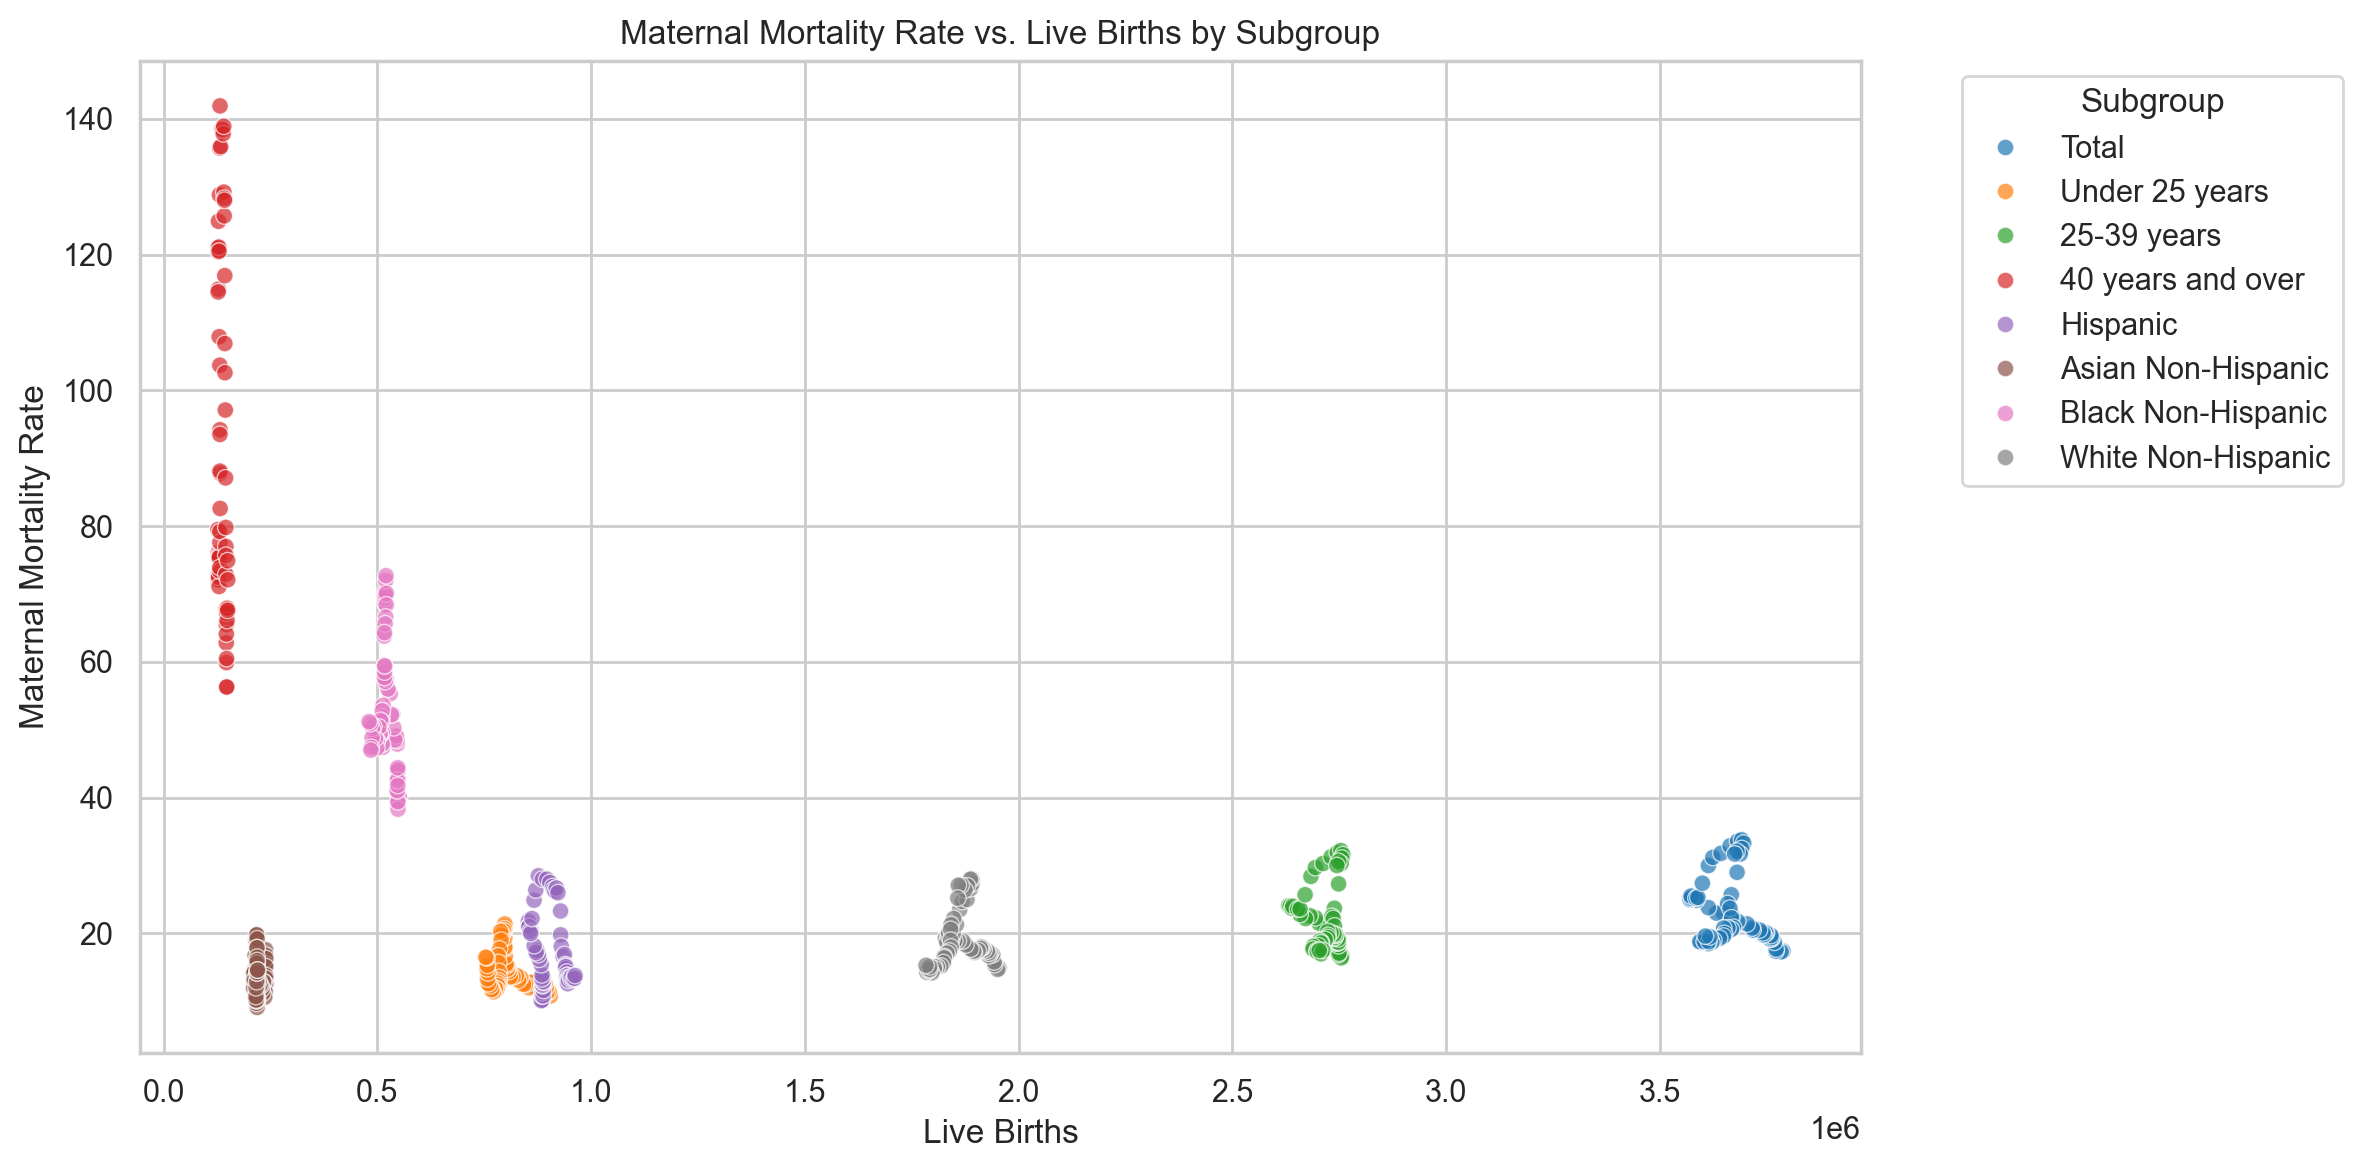

In [264]:
# Create a scatter plot of Maternal Mortality Rate vs. Live Births
plt.figure(figsize=(12, 6))
# Create scatter plot with filtered data
sns.scatterplot(data=filtered_data, x='Live Births', y='Maternal Mortality Rate', 
                hue='Subgroup', palette=subgroup_colors, alpha=0.7)
plt.title("Maternal Mortality Rate vs. Live Births by Subgroup")
plt.xlabel("Live Births")
plt.ylabel("Maternal Mortality Rate")
plt.legend(title='Subgroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

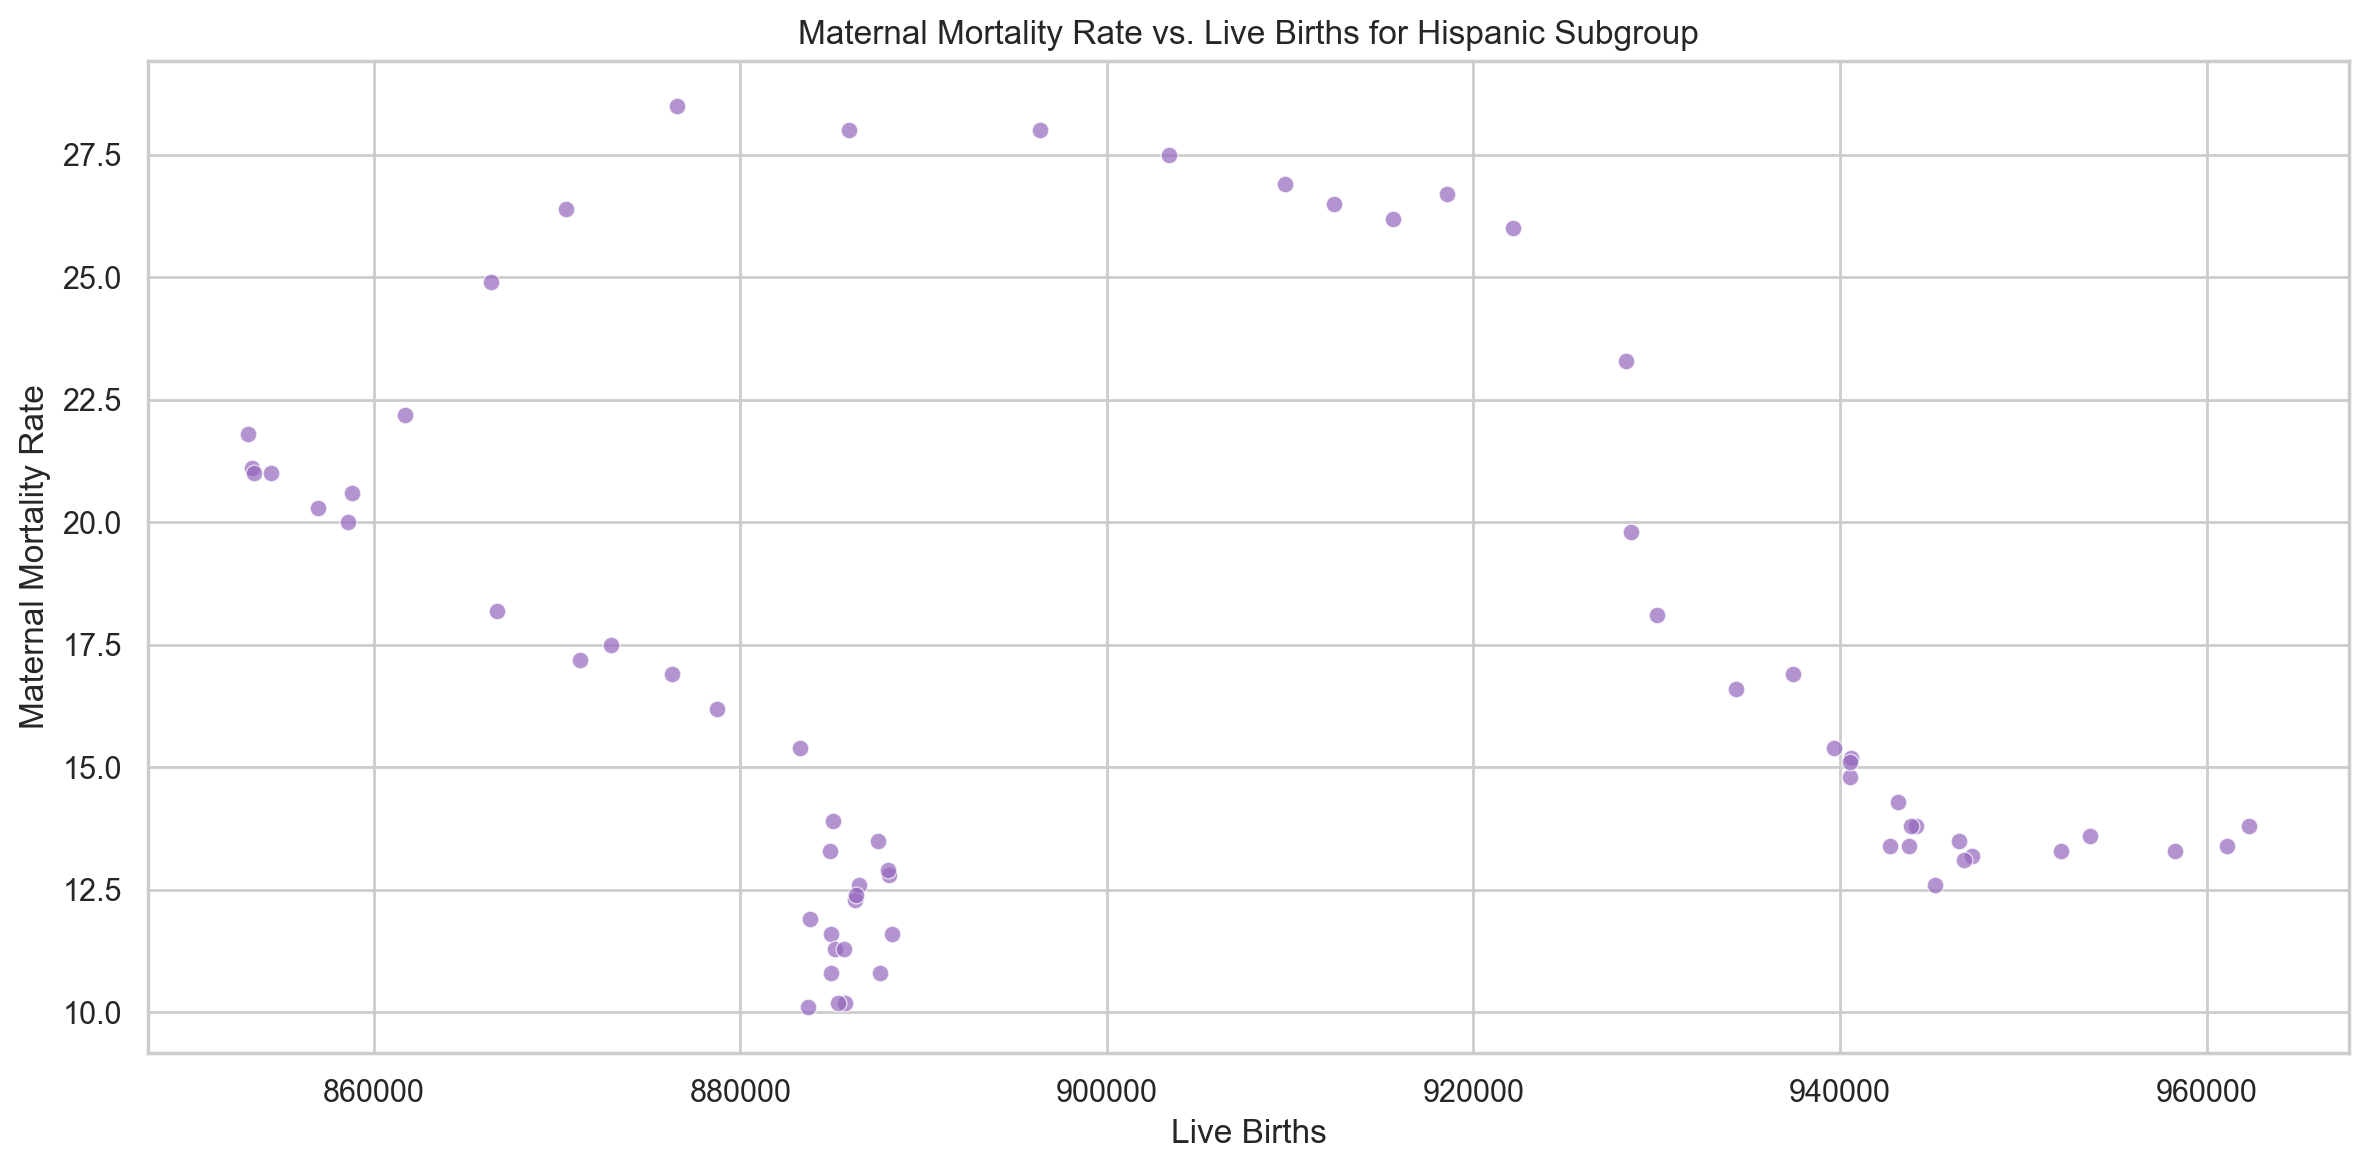

In [269]:
# Create a scatter plot of Maternal Mortality Rate vs. Live Births for Hispanic subgroup
plt.figure(figsize=(12, 6))
# Filter data for Hispanic subgroup
hispanic_data = maternal[maternal['Subgroup'] == 'Hispanic']
# Create scatter plot for Hispanic subgroup
sns.scatterplot(data=hispanic_data, x='Live Births', y='Maternal Mortality Rate', 
                color=subgroup_colors['Hispanic'], alpha=0.7)
plt.title("Maternal Mortality Rate vs. Live Births for Hispanic Subgroup")
plt.xlabel("Live Births")
plt.ylabel("Maternal Mortality Rate")
plt.tight_layout()
plt.show()

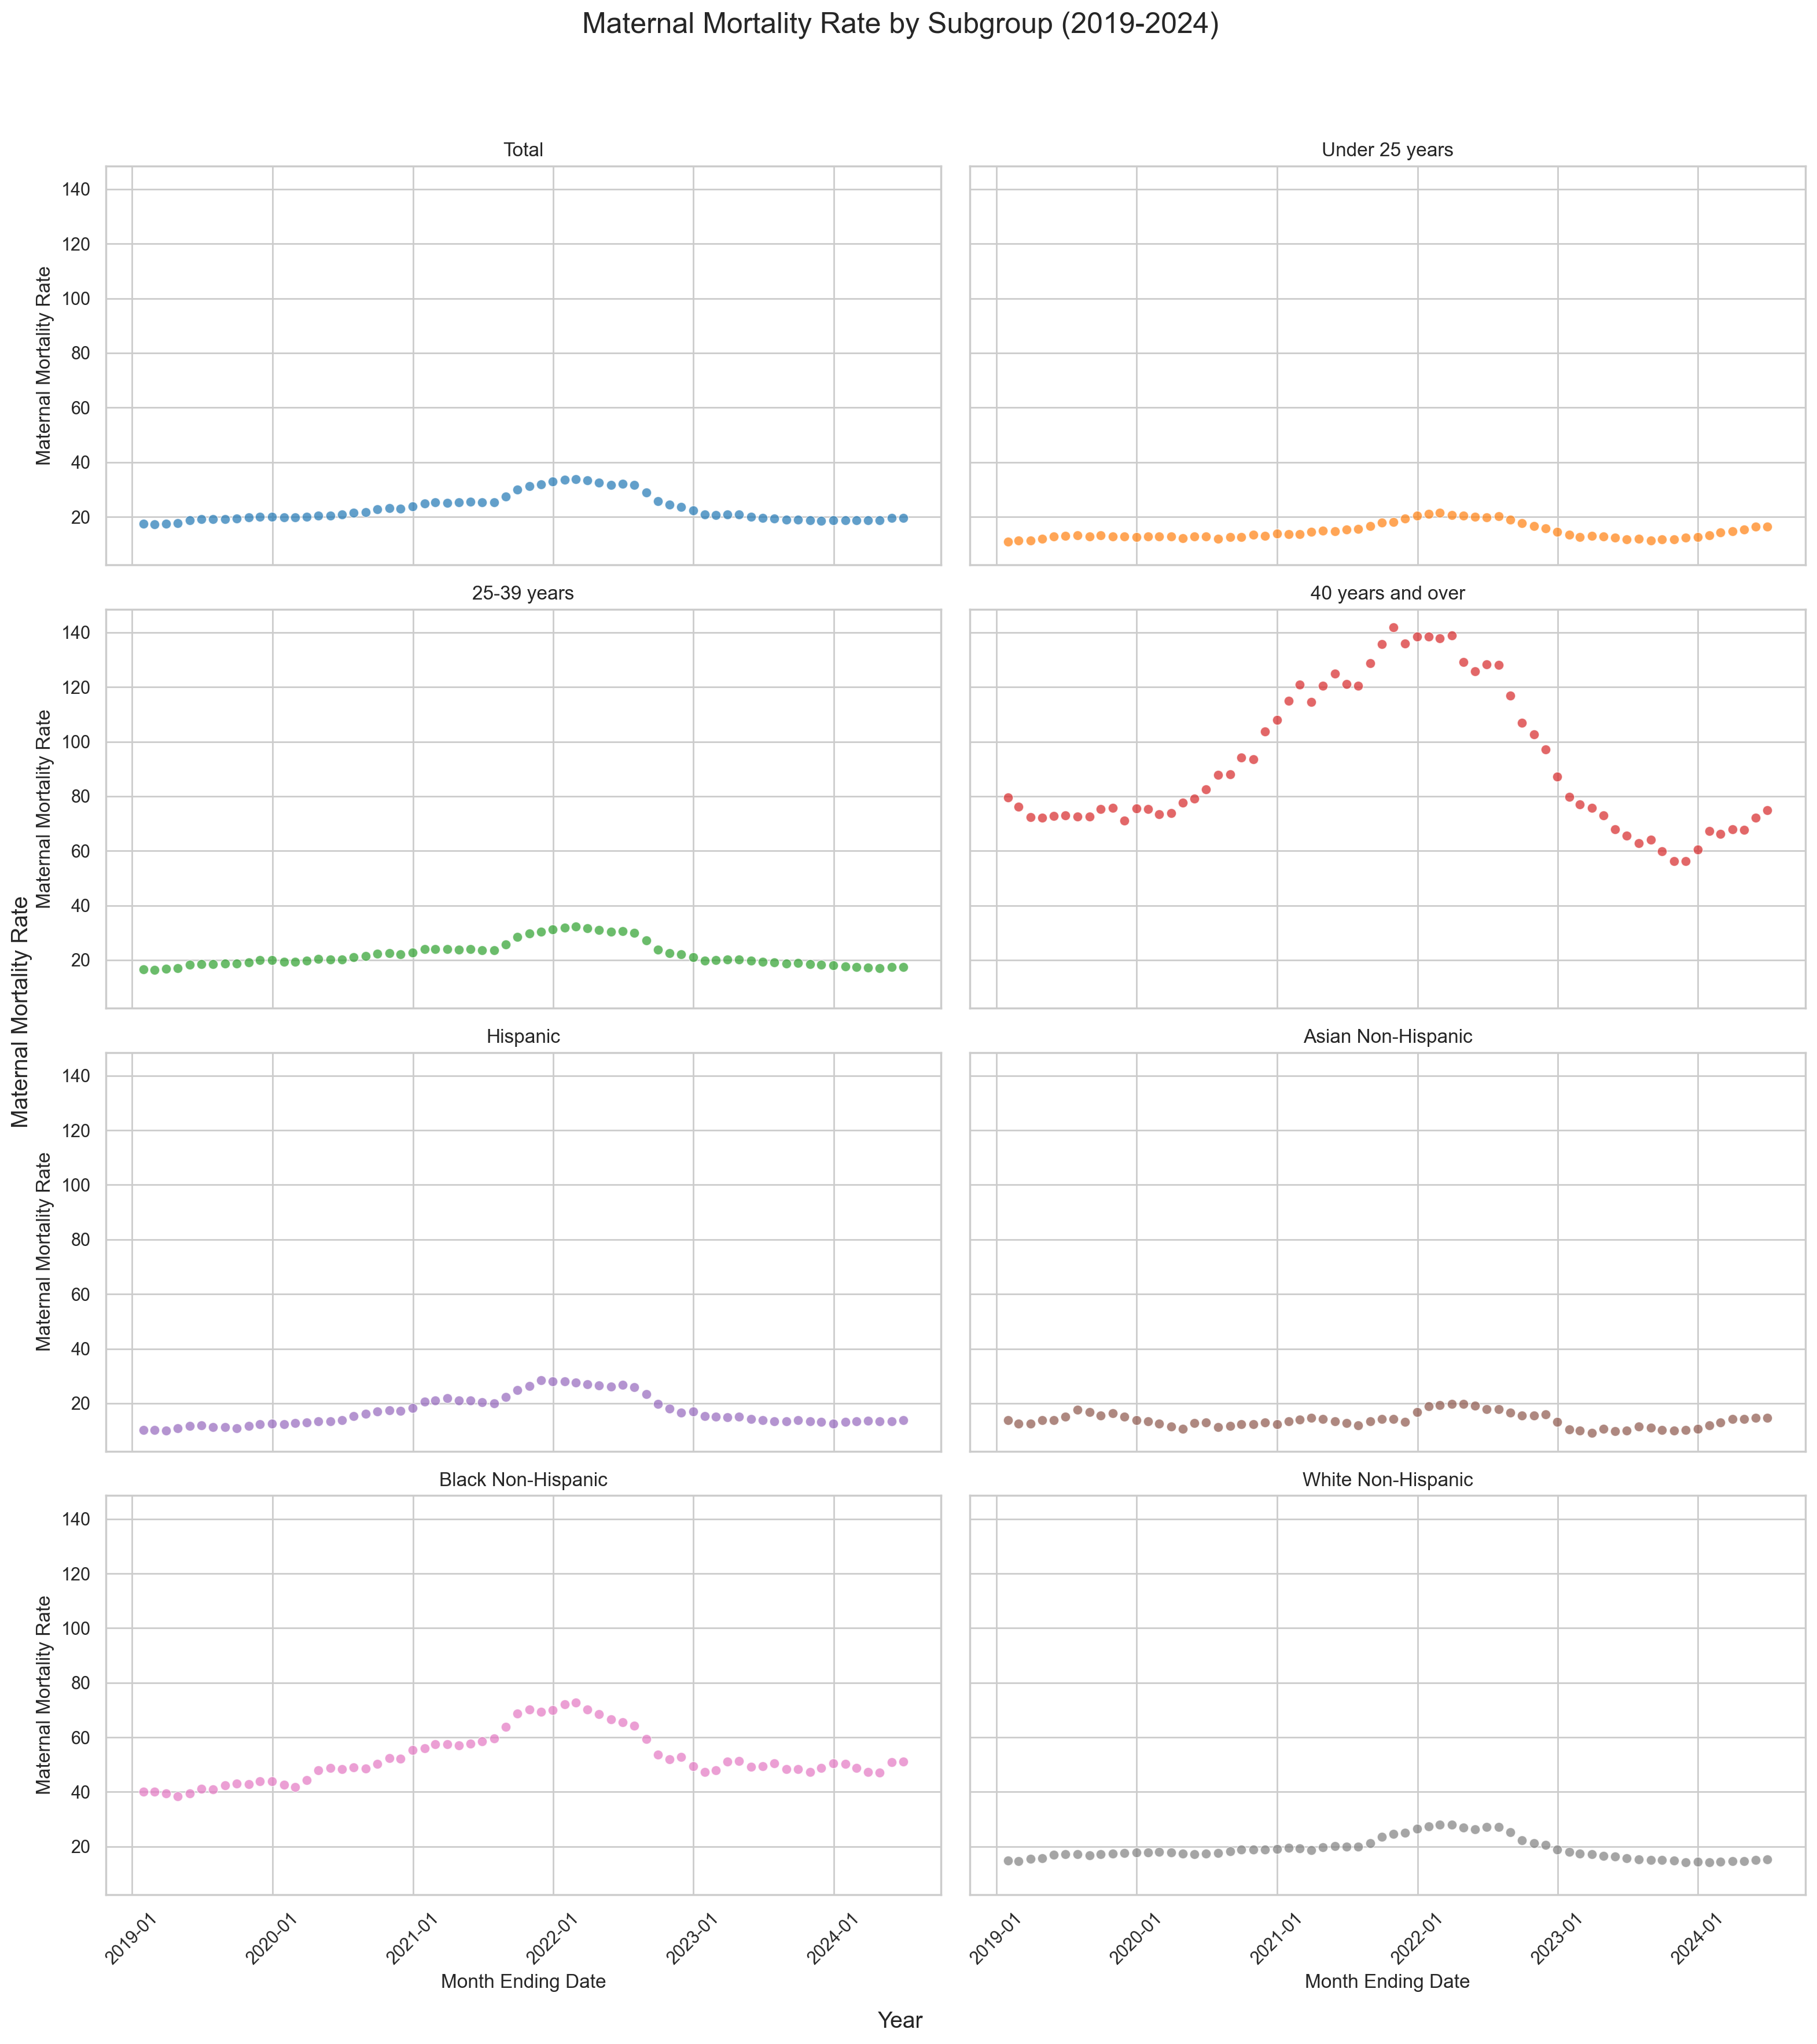

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure date column is in datetime format
maternal['Month Ending Date'] = pd.to_datetime(maternal['Month Ending Date'])

# Filter data from 2019 onwards
start_date = pd.Timestamp('2019-01-01')
filtered_data = maternal[maternal['Month Ending Date'] >= start_date].copy()

# Define your specific subgroup order
subgroups = [
    "Total",
    "Under 25 years",
    "25-39 years",
    "40 years and over",
    "Hispanic",
    "Asian Non-Hispanic",
    "Black Non-Hispanic",
    "White Non-Hispanic"
]

# Optional: Define custom colors or use seaborn palette
palette = sns.color_palette("tab10", len(subgroups))
subgroup_colors = dict(zip(subgroups, palette))

# Create 4x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(16, 18), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each subgroup
for i, subgroup in enumerate(subgroups):
    ax = axes[i]
    data = filtered_data[filtered_data['Subgroup'] == subgroup].sort_values('Month Ending Date')
    
    sns.scatterplot(
        data=data,
        x='Month Ending Date',
        y='Maternal Mortality Rate',
        color=subgroup_colors[subgroup],
        alpha=0.7,
        ax=ax
    )
    
    ax.set_title(subgroup)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.tick_params(axis='x', rotation=45)

# Common labels and layout
fig.suptitle("Maternal Mortality Rate by Subgroup (2019-2024)", fontsize=18)
fig.supxlabel("Year", fontsize=14)
fig.supylabel("Maternal Mortality Rate", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reserve space for title
plt.show()


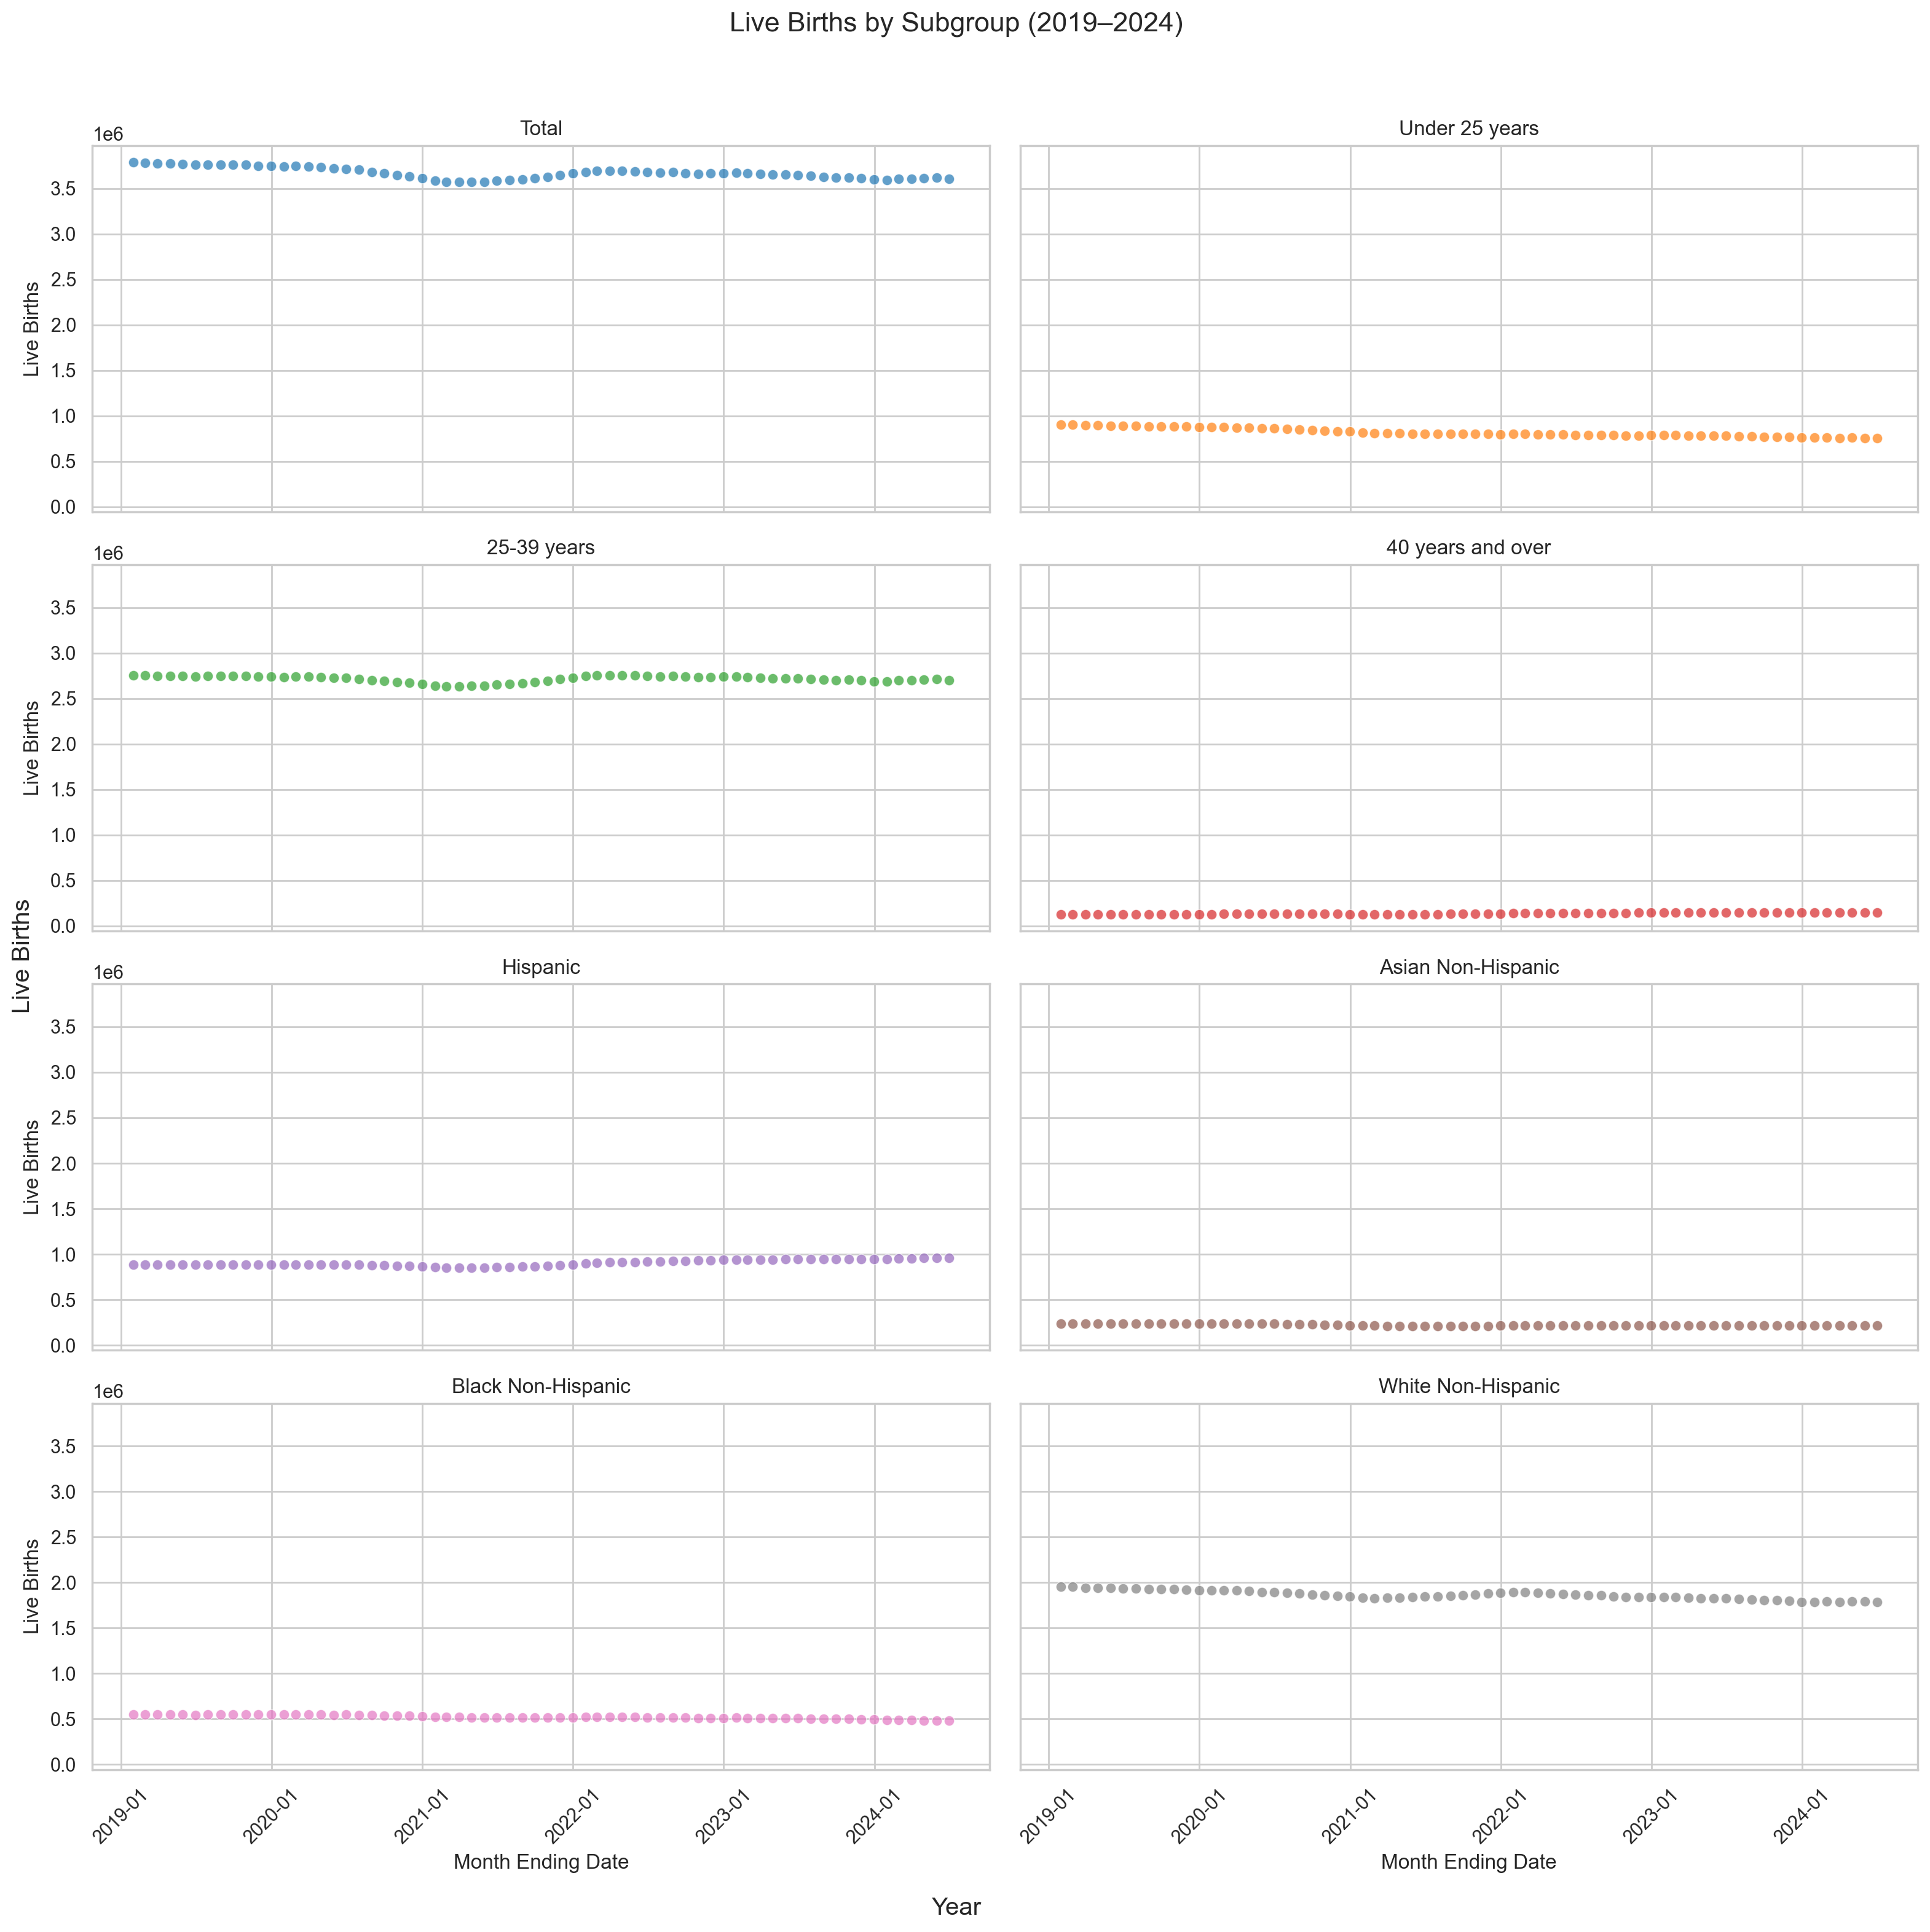

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure date is datetime
maternal['Month Ending Date'] = pd.to_datetime(maternal['Month Ending Date'])

# Filter for data starting in 2019
start_date = pd.Timestamp('2019-01-01')
filtered_data = maternal[maternal['Month Ending Date'] >= start_date].copy()

# Define the 8 subgroups in your preferred order
subgroups = [
    'Total',
    'Under 25 years',
    '25-39 years',
    '40 years and over',
    'Hispanic',
    'Asian Non-Hispanic',
    'Black Non-Hispanic',
    'White Non-Hispanic'
]

# Define color palette for consistency
palette = sns.color_palette('tab10', len(subgroups))
subgroup_colors = dict(zip(subgroups, palette))

# Create 4x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(16, 16), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each subgroup
for i, subgroup in enumerate(subgroups):
    ax = axes[i]
    subgroup_data = filtered_data[filtered_data['Subgroup'] == subgroup].sort_values('Month Ending Date')
    
    sns.scatterplot(
        data=subgroup_data,
        x='Month Ending Date',
        y='Live Births',
        color=subgroup_colors[subgroup],
        alpha=0.7,
        ax=ax
    )
    
    ax.set_title(subgroup)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.tick_params(axis='x', rotation=45)

# Common title and labels
fig.suptitle("Live Births by Subgroup (2019–2024)", fontsize=16)
fig.supxlabel("Year")
fig.supylabel("Live Births")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


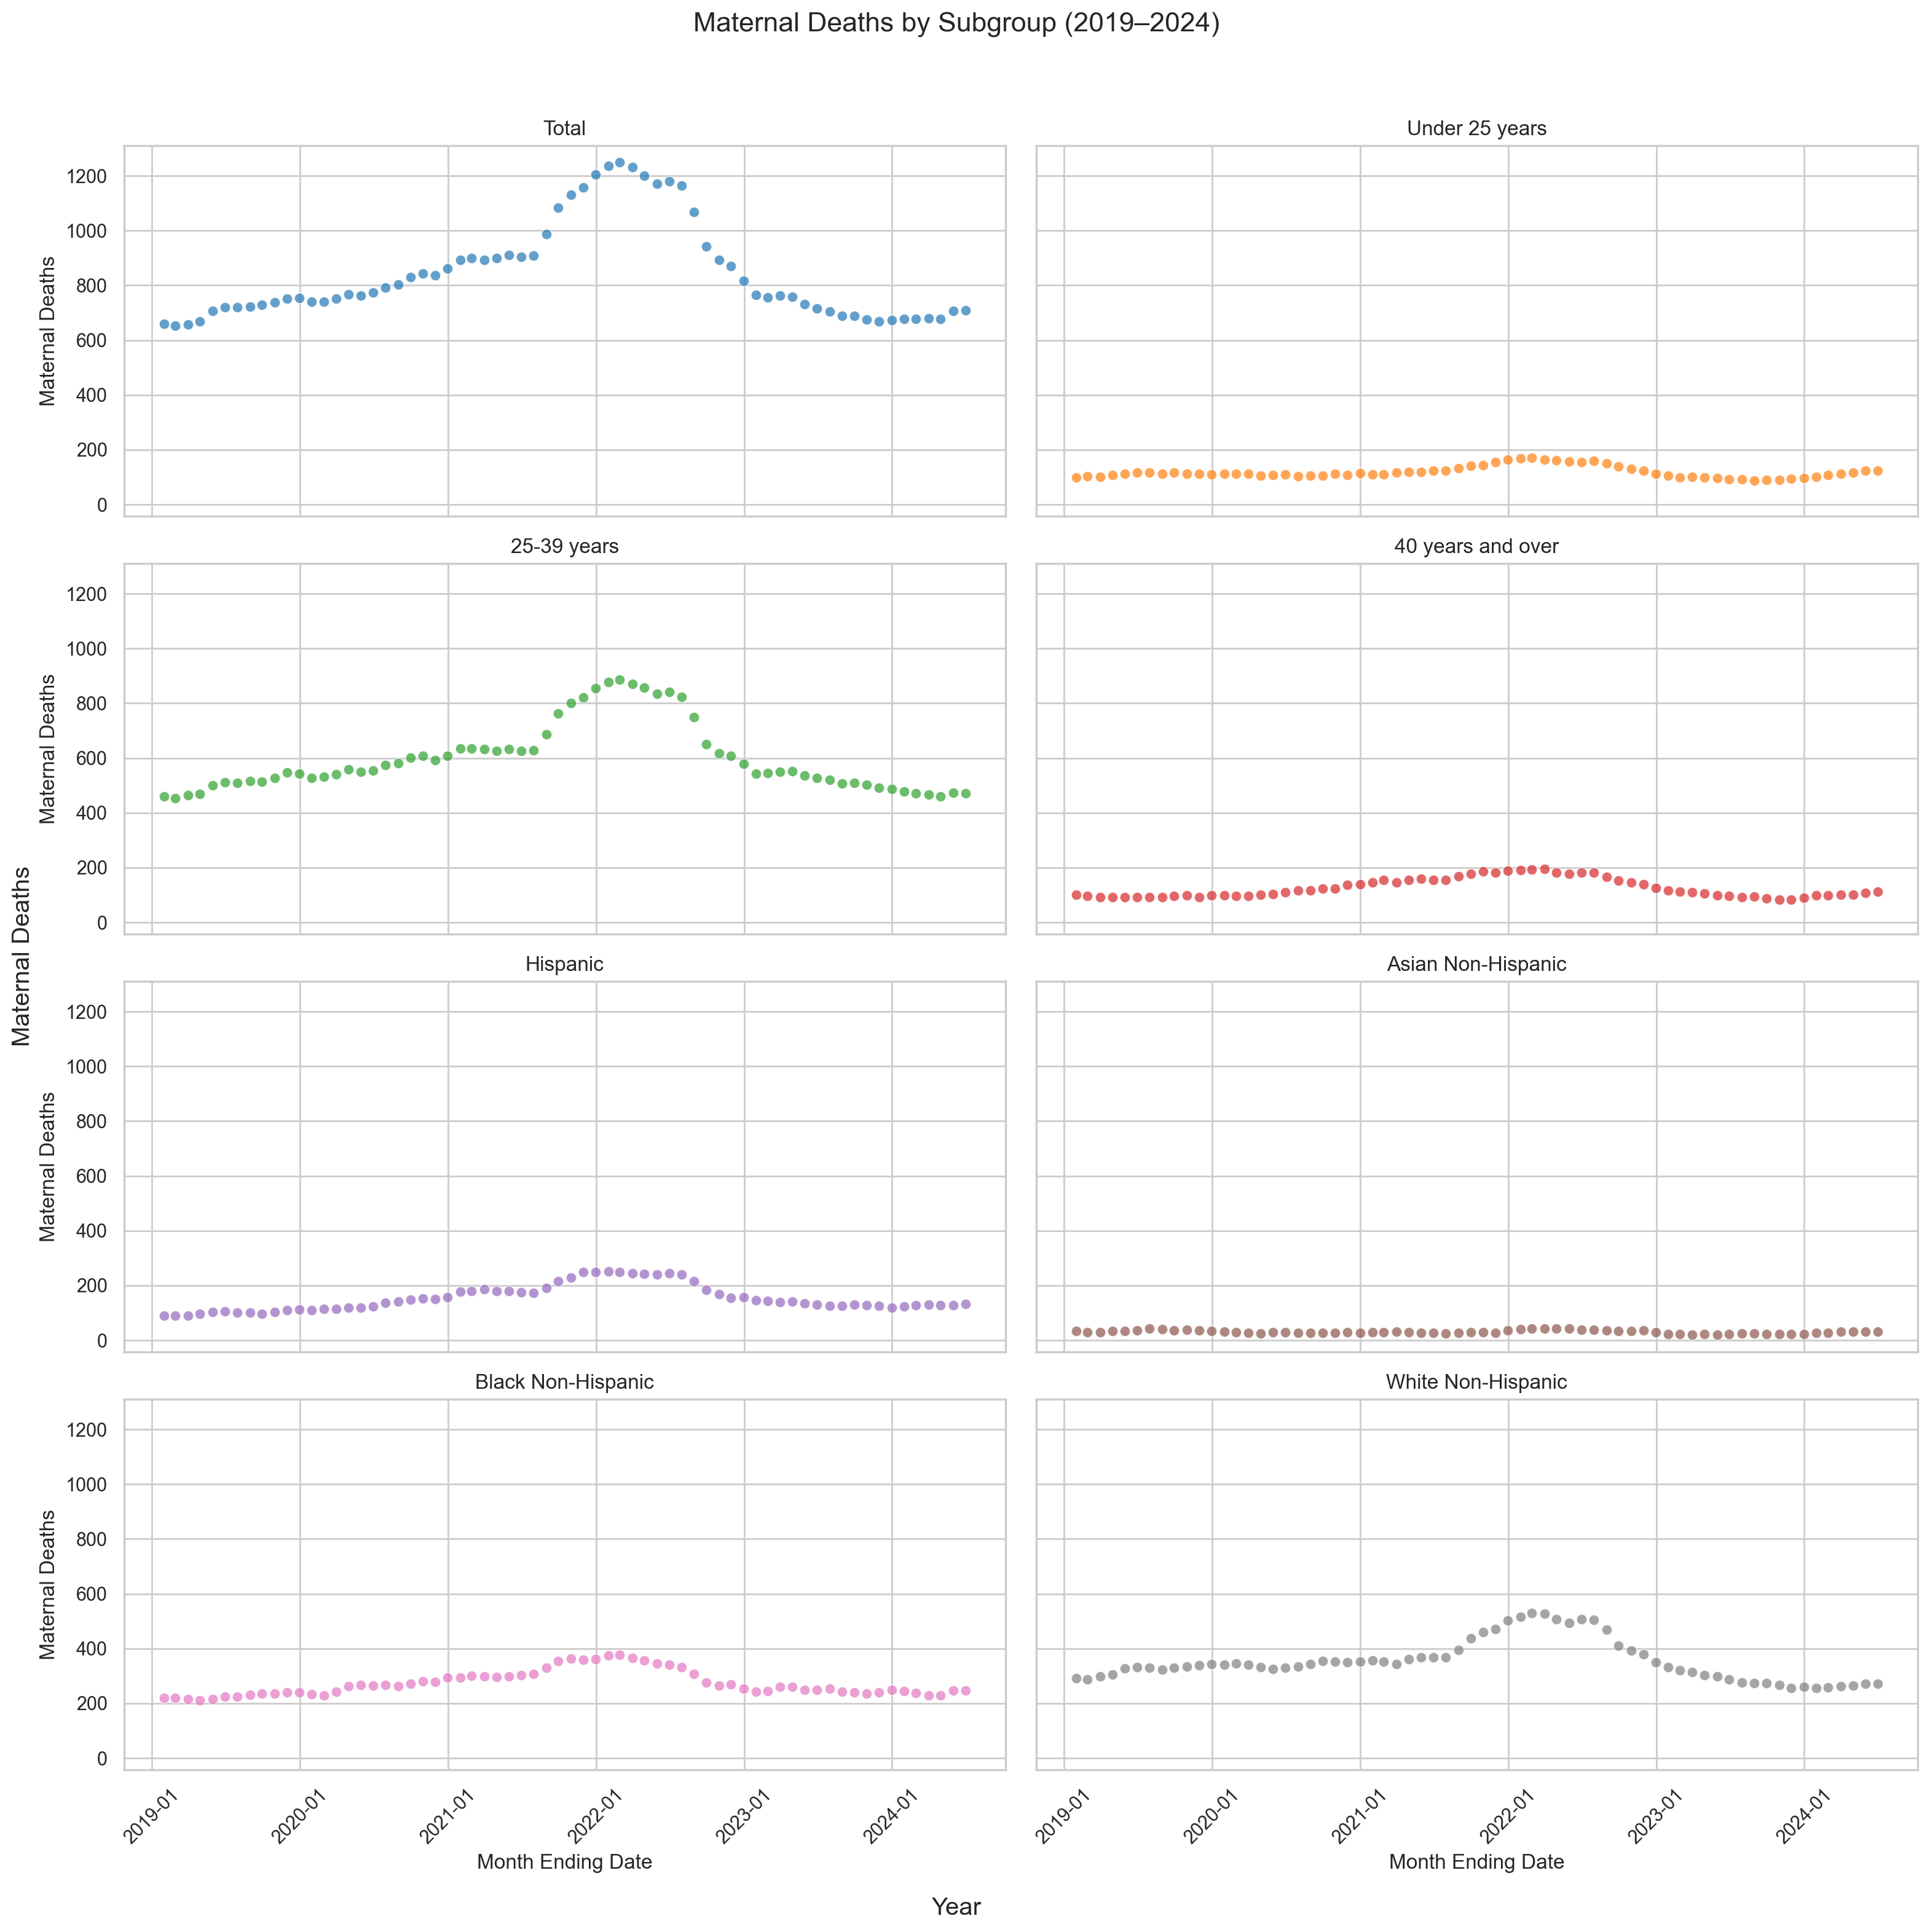

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Ensure date is datetime
maternal['Month Ending Date'] = pd.to_datetime(maternal['Month Ending Date'])

# Filter for data starting in 2019
start_date = pd.Timestamp('2019-01-01')
filtered_data = maternal[maternal['Month Ending Date'] >= start_date].copy()

# Define the 8 subgroups in your preferred order
subgroups = [
    'Total',
    'Under 25 years',
    '25-39 years',
    '40 years and over',
    'Hispanic',
    'Asian Non-Hispanic',
    'Black Non-Hispanic',
    'White Non-Hispanic'
]

# Define color palette
palette = sns.color_palette('tab10', len(subgroups))
subgroup_colors = dict(zip(subgroups, palette))

# Create 4x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(16, 16), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each subgroup
for i, subgroup in enumerate(subgroups):
    ax = axes[i]
    subgroup_data = filtered_data[filtered_data['Subgroup'] == subgroup].sort_values('Month Ending Date')
    
    sns.scatterplot(
        data=subgroup_data,
        x='Month Ending Date',
        y='Maternal Deaths',
        color=subgroup_colors[subgroup],
        alpha=0.7,
        ax=ax
    )
    
    ax.set_title(subgroup)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.tick_params(axis='x', rotation=45)

# Add shared labels and layout formatting
fig.suptitle("Maternal Deaths by Subgroup (2019–2024)", fontsize=16)
fig.supxlabel("Year")
fig.supylabel("Maternal Deaths")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
